In [1]:
import os
import warnings

warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import requests
from plotly import __version__
from plotly import graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot
from IPython.display import display, IFrame

print(__version__)  # need 1.9.0 or greater
init_notebook_mode(connected=True)

5.9.0


In [10]:
def plotly_df(df, title="", width=800, height=500):
    """Visualize all the dataframe columns as line plots."""
    common_kw = dict(x=df.index, mode="lines")
    data = [go.Scatter(y=df[c], name=c, **common_kw) for c in df.columns]
    layout = dict(title=title)
    fig = dict(data=data, layout=layout)

    # in a Jupyter Notebook, the following should work
    iplot(fig, show_link=False)

    # in a Jupyter Book, we save a plot offline and then render it with IFrame
    plot_path = f"C:\\Users\\mateu\\mlcourse.AI\\Topic09\\plots\\{title}.html".replace(" ", "_")
    plot(fig, filename=plot_path, show_link=False, auto_open=False);
    display(IFrame(plot_path, width=width, height=height))

In [5]:
# for Jupyter-book, we copy data from GitHub, locally, to save Internet traffic,
# you can specify the data/ folder from the root of your cloned
# https://github.com/Yorko/mlcourse.ai repo, to save Internet traffic
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"

In [19]:
df = pd.read_csv(DATA_PATH + "wiki_machine_learning.csv", sep=" ")
df = df[df["count"] != 0]
df.head()

,date,count,lang,page,rank,month,title
81,2015-01-01,1414,en,Machine_learning,8708,201501,Machine_learning
80,2015-01-02,1920,en,Machine_learning,8708,201501,Machine_learning
79,2015-01-03,1338,en,Machine_learning,8708,201501,Machine_learning
78,2015-01-04,1404,en,Machine_learning,8708,201501,Machine_learning
77,2015-01-05,2264,en,Machine_learning,8708,201501,Machine_learning


In [20]:
df.shape

(383, 7)

In [21]:
df.date = pd.to_datetime(df.date)

In [22]:
plotly_df(df=df.set_index("date")[["count"]], title="assign9_plot")

In [23]:
from prophet import Prophet

In [24]:
predictions = 30

df = df[["date", "count"]]
df.columns = ["ds", "y"]
df.tail()

,ds,y
382,2016-01-16,1644
381,2016-01-17,1836
376,2016-01-18,2983
375,2016-01-19,3389
372,2016-01-20,3559


We will predict based on first 5 months

In [44]:
train_df = df[:-predictions]
train_df.tail()

,ds,y
358,2015-12-17,2870
363,2015-12-18,2475
364,2015-12-19,1659
344,2015-12-20,1534
343,2015-12-21,2425


In [54]:
m = Prophet()
m.fit(train_df)

17:32:18 - cmdstanpy - INFO - Chain [1] start processing
17:32:18 - cmdstanpy - INFO - Chain [1] done processing


In [55]:
future = m.make_future_dataframe(periods=predictions)
forecast = m.predict(future)
forecast 


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01,2157.330780,2088.505811,2893.154652,2157.330780,2157.330780,327.383743,327.383743,327.383743,327.383743,327.383743,327.383743,0.0,0.0,0.0,2484.714523
1,2015-01-02,2160.161581,1729.588246,2555.869906,2160.161581,2160.161581,7.025891,7.025891,7.025891,7.025891,7.025891,7.025891,0.0,0.0,0.0,2167.187471
2,2015-01-03,2162.992382,885.861157,1698.610167,2162.992382,2162.992382,-862.545964,-862.545964,-862.545964,-862.545964,-862.545964,-862.545964,0.0,0.0,0.0,1300.446418
3,2015-01-04,2165.823182,1035.644870,1850.931040,2165.823182,2165.823182,-721.525739,-721.525739,-721.525739,-721.525739,-721.525739,-721.525739,0.0,0.0,0.0,1444.297443
4,2015-01-05,2168.653983,2054.830614,2865.572717,2168.653983,2168.653983,281.375854,281.375854,281.375854,281.375854,281.375854,281.375854,0.0,0.0,0.0,2450.029837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,2016-01-16,2975.100998,1724.428560,2543.699959,2955.690367,2994.932103,-862.545964,-862.545964,-862.545964,-862.545964,-862.545964,-862.545964,0.0,0.0,0.0,2112.555034
379,2016-01-17,2980.432400,1852.877181,2654.493584,2959.802246,3001.413515,-721.525739,-721.525739,-721.525739,-721.525739,-721.525739,-721.525739,0.0,0.0,0.0,2258.906661
380,2016-01-18,2985.763803,2853.319833,3658.218130,2963.698202,3007.668926,281.375854,281.375854,281.375854,281.375854,281.375854,281.375854,0.0,0.0,0.0,3267.139657
381,2016-01-19,2991.095205,3104.850963,3925.496837,2967.761685,3014.110133,542.213022,542.213022,542.213022,542.213022,542.213022,542.213022,0.0,0.0,0.0,3533.308227


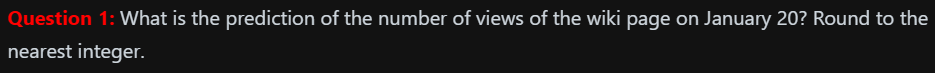

In [56]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
378,2016-01-16,2975.100998,1724.428560,2543.699959,2955.690367,2994.932103,-862.545964,-862.545964,-862.545964,-862.545964,-862.545964,-862.545964,0.0,0.0,0.0,2112.555034
379,2016-01-17,2980.432400,1852.877181,2654.493584,2959.802246,3001.413515,-721.525739,-721.525739,-721.525739,-721.525739,-721.525739,-721.525739,0.0,0.0,0.0,2258.906661
380,2016-01-18,2985.763803,2853.319833,3658.218130,2963.698202,3007.668926,281.375854,281.375854,281.375854,281.375854,281.375854,281.375854,0.0,0.0,0.0,3267.139657
381,2016-01-19,2991.095205,3104.850963,3925.496837,2967.761685,3014.110133,542.213022,542.213022,542.213022,542.213022,542.213022,542.213022,0.0,0.0,0.0,3533.308227
382,2016-01-20,2996.426608,2989.502875,3817.701743,2971.537741,3020.645304,426.073193,426.073193,426.073193,426.073193,426.073193,426.073193,0.0,0.0,0.0,3422.499801


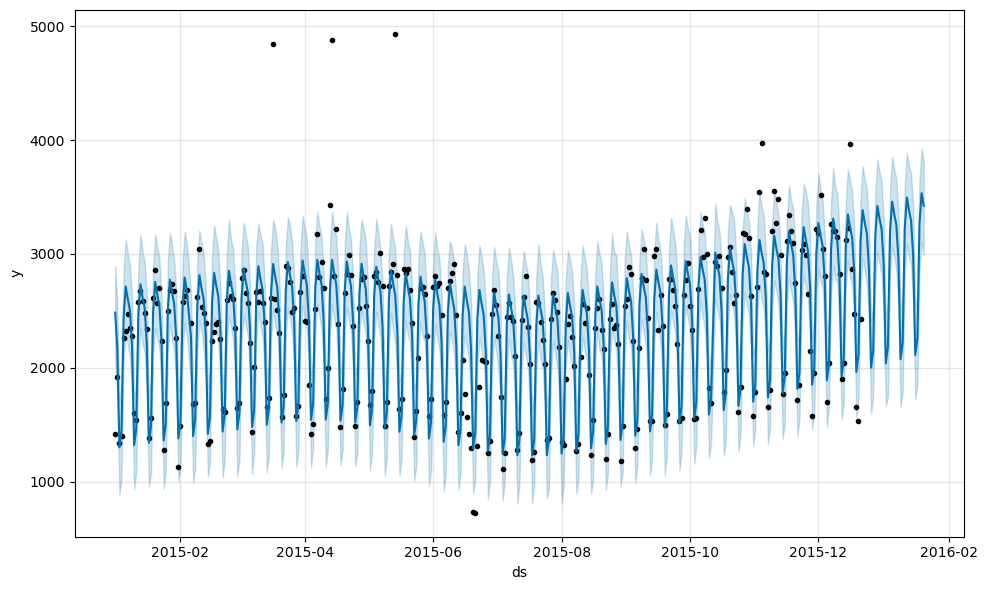

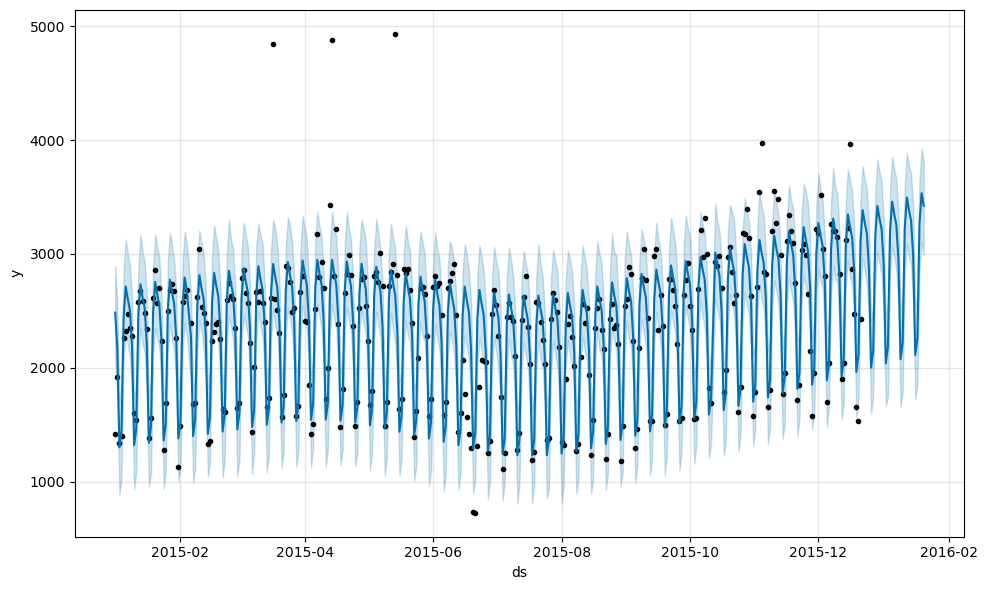

In [57]:
m.plot(forecast)

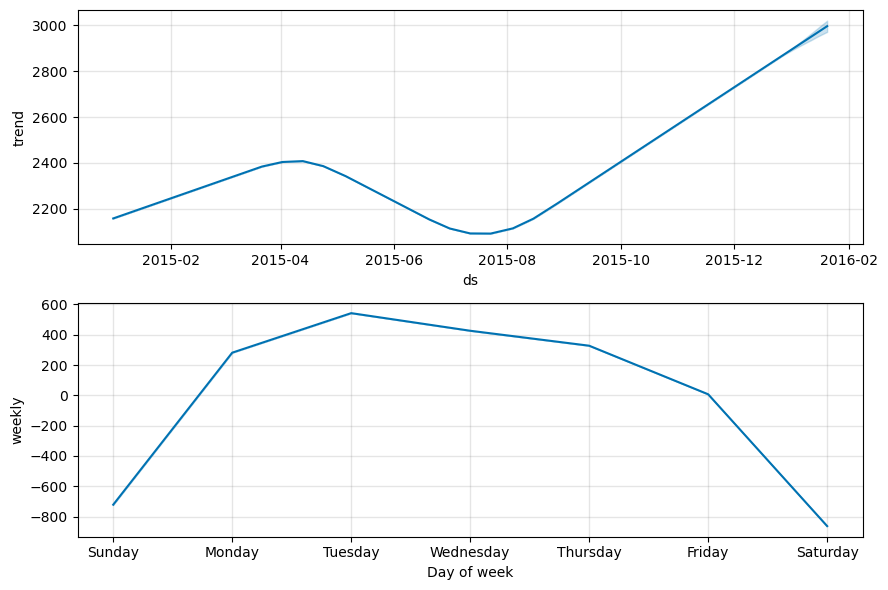

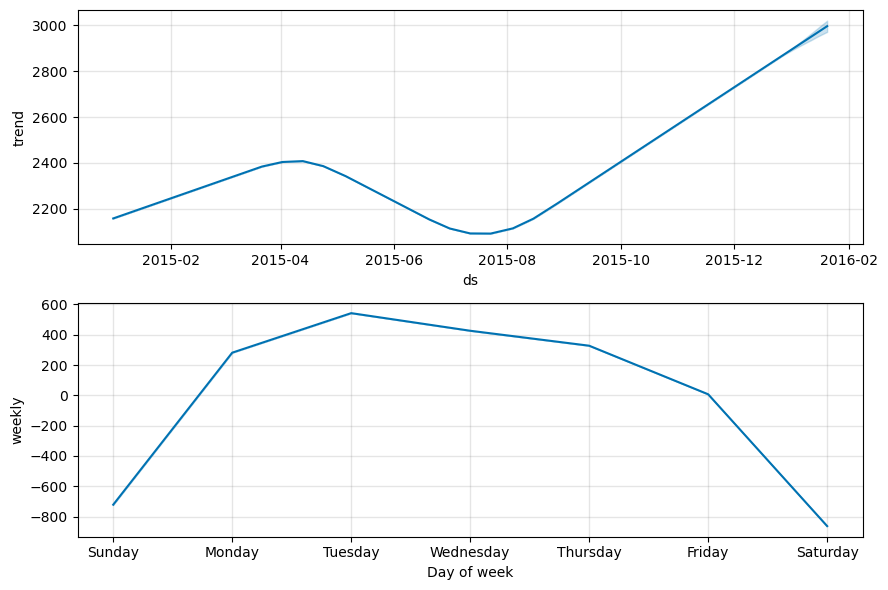

In [58]:
m.plot_components(forecast)

In [59]:
cmp_df = forecast.set_index("ds")[["yhat", "yhat_lower", "yhat_upper"]].join(
    df.set_index("ds")
)

In [60]:
cmp_df["e"] = cmp_df["y"] - cmp_df["yhat"]
cmp_df["p"] = 100 * cmp_df["e"] / cmp_df["y"]
print("MAPE = ", round(np.mean(abs(cmp_df[-predictions:]["p"])), 2))
print("MAE = ", round(np.mean(abs(cmp_df[-predictions:]["e"])), 2))

MAPE =  34.35
MAE =  596.73


In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

plt.rcParams["figure.figsize"] = (15, 10)

Dickey-Fuller test: p=0.107392


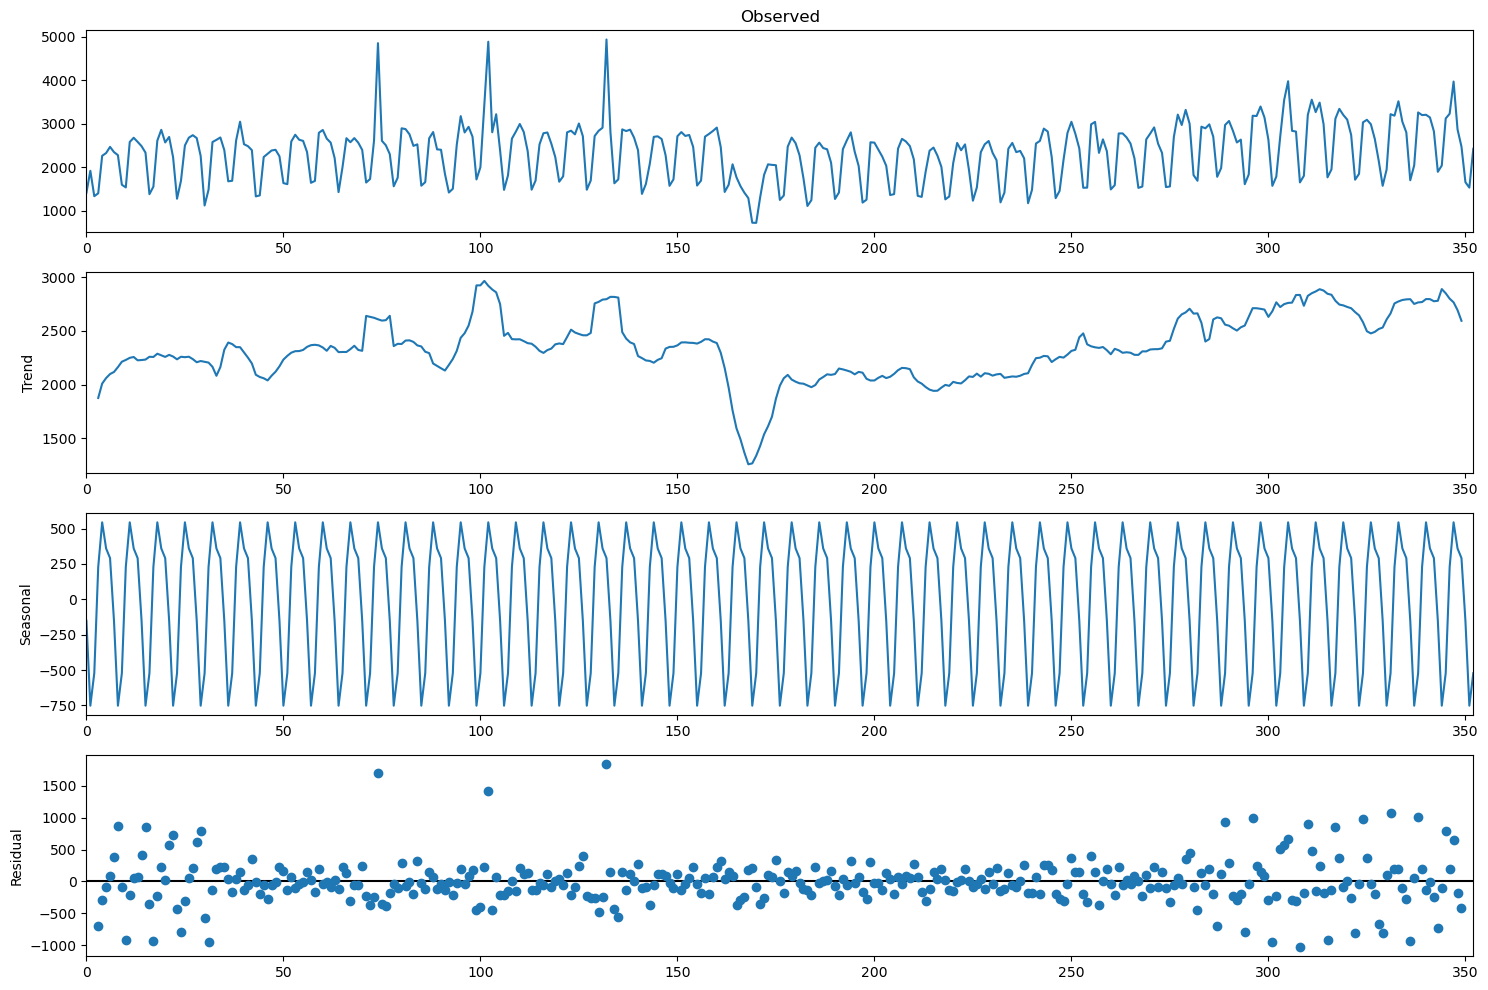

In [62]:
sm.tsa.seasonal_decompose(train_df["y"].values, period=7).plot()
print("Dickey-Fuller test: p=%f" % sm.tsa.stattools.adfuller(train_df["y"])[1])

In [64]:
train_df.set_index("ds", inplace=True)

Dickey-Fuller test: p=0.000000


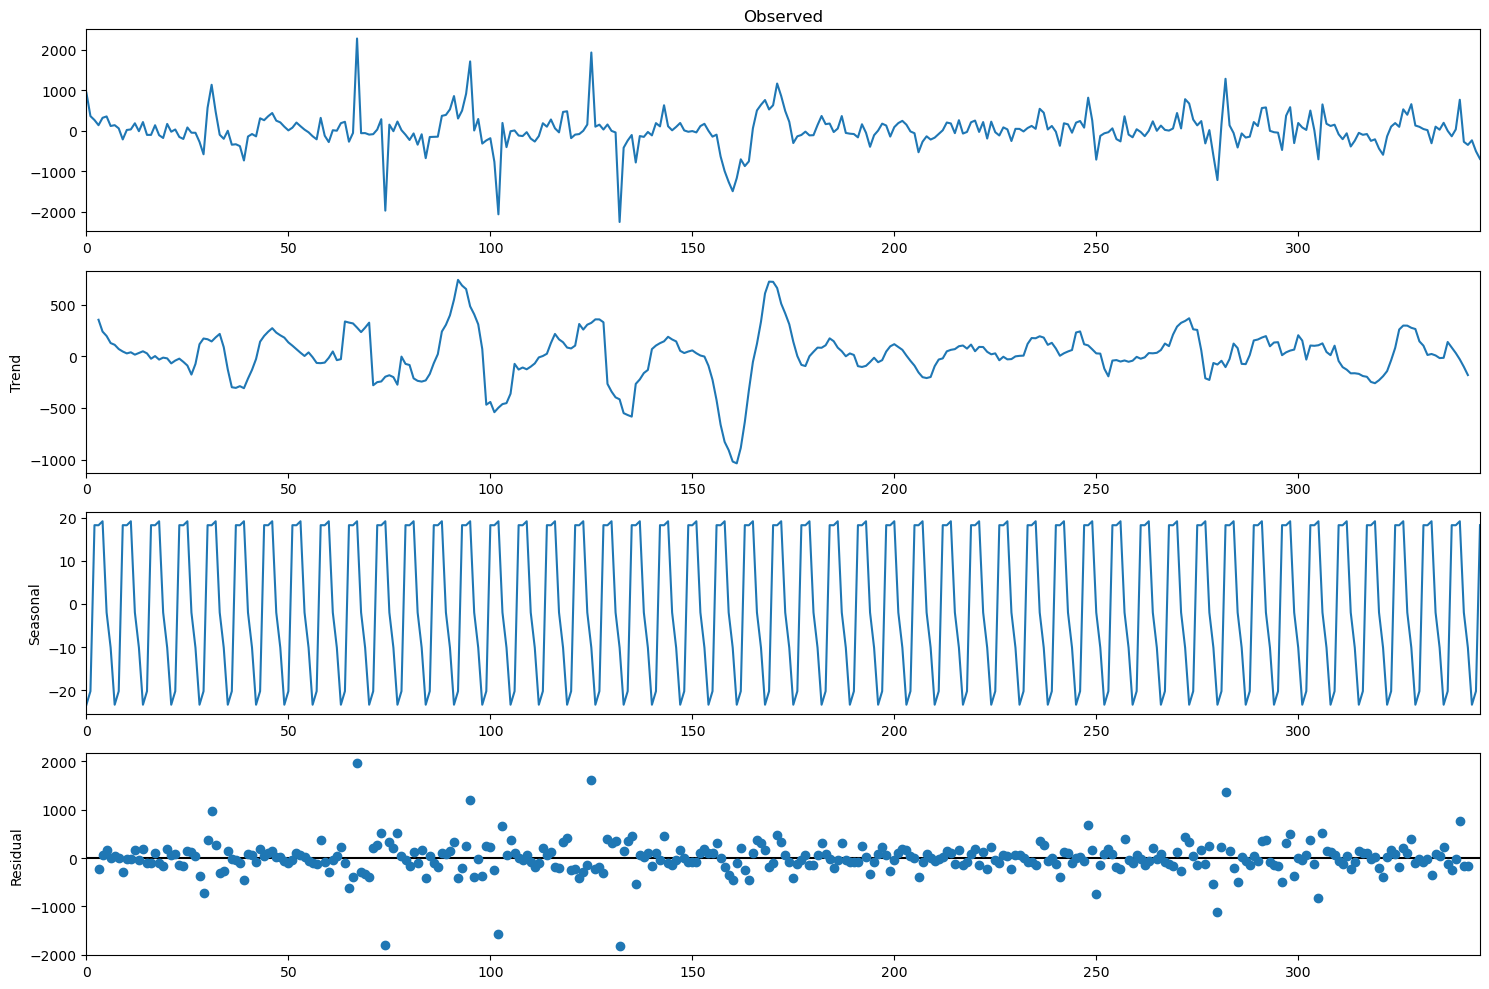

In [65]:
train_df["y_diff"] = train_df.y - train_df.y.shift(7)
sm.tsa.seasonal_decompose(train_df.y_diff[7:].values, period=7).plot()
print("Dickey-Fuller test: p=%f" % sm.tsa.stattools.adfuller(train_df.y_diff[8:])[1])

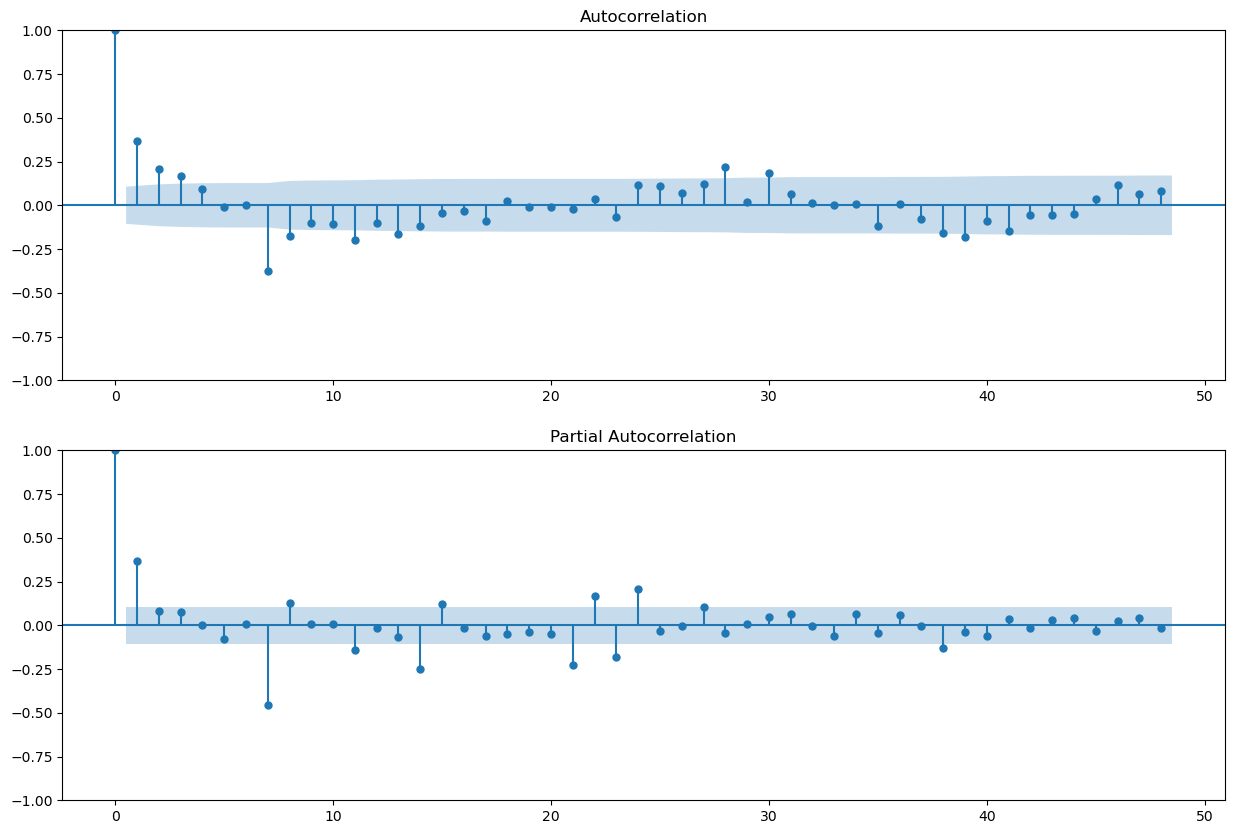

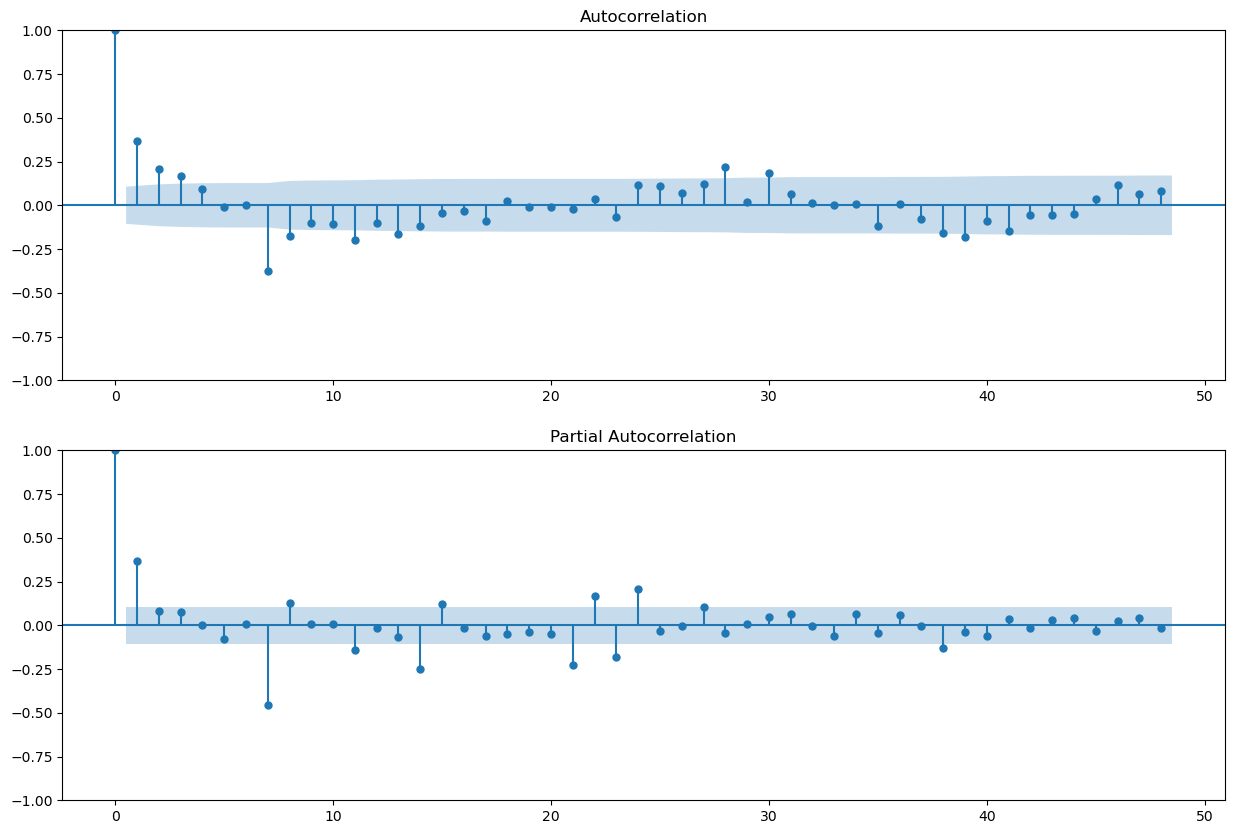

In [66]:
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(train_df.y_diff[13:].values.squeeze(), lags=48, ax=ax)

ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(train_df.y_diff[13:].values.squeeze(), lags=48, ax=ax)

In [67]:
ps = range(0, 2)
ds = range(0, 2)
qs = range(0, 4)
Ps = range(0, 4)
Ds = range(0, 3)
Qs = range(0, 2)

In [68]:
from itertools import product

parameters = product(ps, ds, qs, Ps, Ds, Qs)
parameters_list = list(parameters)
len(parameters_list)

384

In [69]:
%%time
import warnings

from tqdm.notebook import tqdm

results1 = []
best_aic = float("inf")
warnings.filterwarnings("ignore")

for param in tqdm(parameters_list):
    # try except is necessary, because on some sets of parameters the model can not be trained
    try:
        model = sm.tsa.statespace.SARIMAX(
            train_df["y"],
            order=(param[0], param[1], param[2]),
            seasonal_order=(param[3], param[4], param[5], 7),
            # train the model as is even if that would lead to a non-stationary / non-invertible model
            # see https://github.com/statsmodels/statsmodels/issues/6225 for details
        ).fit(disp=-1)

    except (ValueError, np.linalg.LinAlgError):
        continue

    aic = model.aic
    # save the best model, aic, parameters
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results1.append([param, model.aic])

  0%|          | 0/384 [00:00<?, ?it/s]

CPU times: total: 1h 18min 32s
Wall time: 15min 29s


In [70]:
result_table1 = pd.DataFrame(results1)
result_table1.columns = ["parameters", "aic"]
print(result_table1.sort_values(by="aic", ascending=True).head())

             parameters   aic
201  (1, 0, 0, 2, 0, 0)   8.0
41   (0, 0, 1, 3, 0, 0)  10.0
42   (0, 0, 1, 3, 0, 1)  12.0
343  (1, 1, 2, 1, 2, 1)  12.0
378  (1, 1, 3, 3, 2, 0)  16.0


In [71]:
result_table1[
    result_table1["parameters"].isin(
        [(1, 0, 2, 3, 1, 0), (1, 1, 2, 3, 2, 1), (1, 1, 2, 3, 1, 1), (1, 0, 2, 3, 0, 0)]
    )
].sort_values(by="aic")

,parameters,aic
355,"(1, 1, 2, 3, 2, 1)",4988.959262
353,"(1, 1, 2, 3, 1, 1)",5019.555903
256,"(1, 0, 2, 3, 1, 0)",5022.312524
254,"(1, 0, 2, 3, 0, 0)",5183.818034


In [72]:
result_table1[
    result_table1["parameters"].isin(
        [(1, 0, 2, 3, 1, 0), (1, 1, 2, 3, 2, 1), (1, 1, 2, 3, 1, 1), (1, 0, 2, 3, 0, 0)]
    )
].sort_values(by="aic")

,parameters,aic
355,"(1, 1, 2, 3, 2, 1)",4988.959262
353,"(1, 1, 2, 3, 1, 1)",5019.555903
256,"(1, 0, 2, 3, 1, 0)",5022.312524
254,"(1, 0, 2, 3, 0, 0)",5183.818034


Now for Box-Cox

In [73]:
import scipy.stats

train_df["y_box"], lmbda = scipy.stats.boxcox(train_df["y"])
print("The optimal Box-Cox transformation parameter: %f" % lmbda)

The optimal Box-Cox transformation parameter: 0.732841


In [74]:
results2 = []
best_aic = float("inf")

for param in tqdm(parameters_list):
    # try except is necessary, because on some sets of parameters the model can not be trained
    try:
        model = sm.tsa.statespace.SARIMAX(
            train_df["y_box"],
            order=(param[0], param[1], param[2]),
            seasonal_order=(param[3], param[4], param[5], 7),
            # train the model as is even if that would lead to a non-stationary / non-invertible model
            # see https://github.com/statsmodels/statsmodels/issues/6225 for details
            enforce_stationary=False,  
            enforce_invertibility=False  
        ).fit(disp=-1)

    except (ValueError, np.linalg.LinAlgError):
        continue

    aic = model.aic
    # save the best model, aic, parameters
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results2.append([param, model.aic])

warnings.filterwarnings("default")

  0%|          | 0/384 [00:00<?, ?it/s]

In [75]:
result_table2 = pd.DataFrame(results2)
result_table2.columns = ["parameters", "aic"]
print(result_table2.sort_values(by="aic", ascending=True).head())

             parameters          aic
37   (0, 0, 1, 2, 0, 1)    10.000000
280  (1, 0, 3, 3, 0, 0)    16.000000
376  (1, 1, 3, 3, 0, 0)    16.000000
261  (1, 0, 2, 3, 2, 1)  3529.124871
285  (1, 0, 3, 3, 2, 1)  3529.820329


In [76]:
result_table2[
    result_table2["parameters"].isin(
        [(1, 0, 2, 3, 1, 0), (1, 1, 2, 3, 2, 1), (1, 1, 2, 3, 1, 1), (1, 0, 2, 3, 0, 0)]
    )
].sort_values(by="aic")

,parameters,aic
258,"(1, 0, 2, 3, 1, 0)",3556.880030
355,"(1, 1, 2, 3, 1, 1)",3558.490681
357,"(1, 1, 2, 3, 2, 1)",3559.152484
256,"(1, 0, 2, 3, 0, 0)",3674.914346


In [77]:
best_model = sm.tsa.statespace.SARIMAX(
    train_df["y_box"],
    order=(1, 0, 2),
    seasonal_order=(3, 2, 1, 7),
    enforce_stationary=False,  
    enforce_invertibility=False  
).fit(disp=-1)

c:\Users\mateu\anaconda3\envs\test2\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\mateu\anaconda3\envs\test2\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [78]:
print(best_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               y_box   No. Observations:                  353
Model:             SARIMAX(1, 0, 2)x(3, 2, [1], 7)   Log Likelihood               -1756.562
Date:                             Tue, 08 Jul 2025   AIC                           3529.125
Time:                                     18:12:13   BIC                           3559.733
Sample:                                          0   HQIC                          3541.322
                                             - 353                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8667      0.094      9.206      0.000       0.682       1.051
ma.L1         -0.3641      

Student's test: p=0.119182
Dickey-Fuller test: p=0.000000


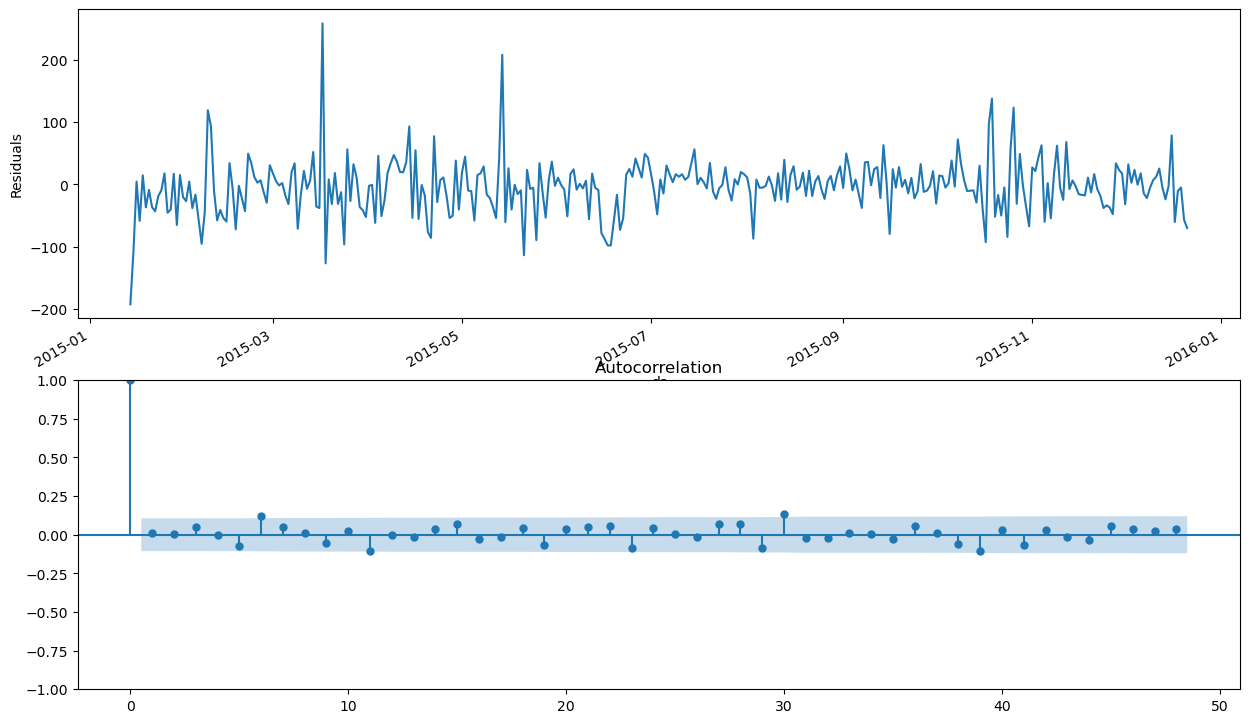

In [79]:
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u"Residuals")

ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=48, ax=ax)

print("Student's test: p=%f" % stats.ttest_1samp(best_model.resid[13:], 0)[1])
print("Dickey-Fuller test: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[13:])[1])

In [80]:
def invboxcox(y, lmbda):
    # reverse Box Cox transformation
    if lmbda == 0:
        return np.exp(y)
    else:
        return np.exp(np.log(lmbda * y + 1) / lmbda)

C:\Users\mateu\AppData\Local\Temp\ipykernel_13680\1382166024.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



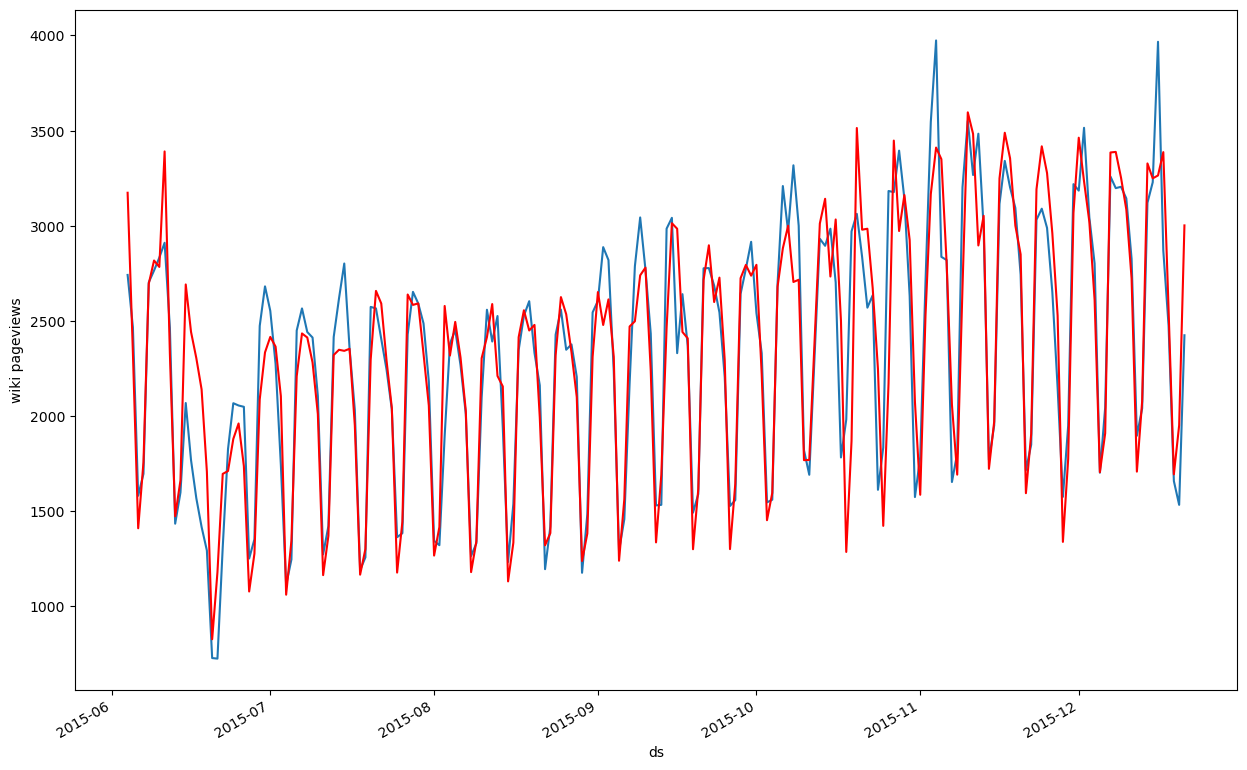

In [81]:
train_df["arima_model"] = invboxcox(best_model.fittedvalues, lmbda)

train_df.y.tail(200).plot()
train_df.arima_model[13:].tail(200).plot(color="r")
plt.ylabel("wiki pageviews");